In [110]:
import numpy as np
US_ROUNDTRIP_CM = 57.0

In [111]:
def read_csv(file_name):
    data = np.genfromtxt(file_name, delimiter=';')
    return data

In [112]:
drop_data = read_csv('data/drop_data_sonar.csv')

In [113]:
print(drop_data[0:5])

[[199361.    351.]
 [199375.    347.]
 [199391.    371.]
 [199405.    371.]
 [199420.    371.]]


In [114]:
#subtract initial height
drop_data[:, 1] = drop_data[-1, 1] - drop_data[:, 1]
# convert to cm
drop_data[:, 1] = drop_data[:, 1] / US_ROUNDTRIP_CM
# get distance in column vector
distances = drop_data[:, 1].reshape(-1, 1)
distances = distances / 100 # convert to meters

In [115]:
print(distances[0:5])

[[0.76912281]
 [0.76982456]
 [0.76561404]
 [0.76561404]
 [0.76561404]]


In [116]:
timestamps = drop_data[:, 0]
timestamps = timestamps - timestamps[0]
timestamps = timestamps/1000 # convert to seconds
print(timestamps[0:5])

[0.    0.014 0.03  0.044 0.059]


In [117]:
# plot x, y anz acceleration in time    
import matplotlib.pyplot as plt
def plot_axis_data(data, timestamps, title=''):
    plt.xticks(np.arange(0, len(data), 10, dtype=np.uint32), timestamps[::10].round(2))
    plt.xlabel('Time (s)')
    plt.ylabel("Height (m)")
    plt.plot(data[:, 0], label='y')
    plt.title(title)
    # set plot size
    plt.rcParams["figure.figsize"] = (20,10)
    plt.legend()
    plt.show()

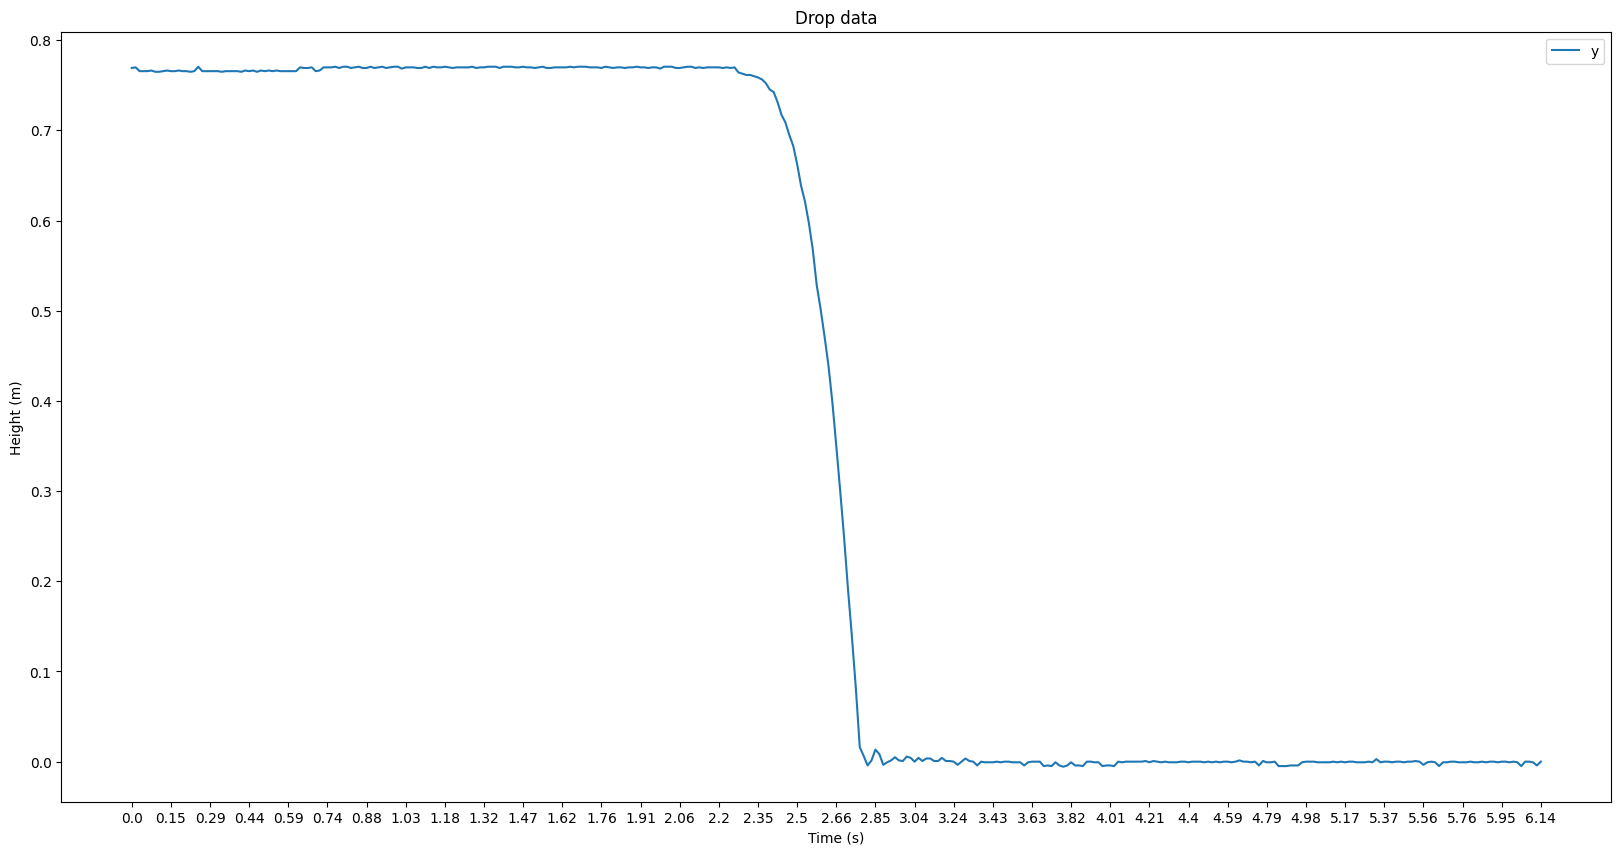

In [118]:
plot_axis_data(distances, timestamps, 'Drop data')

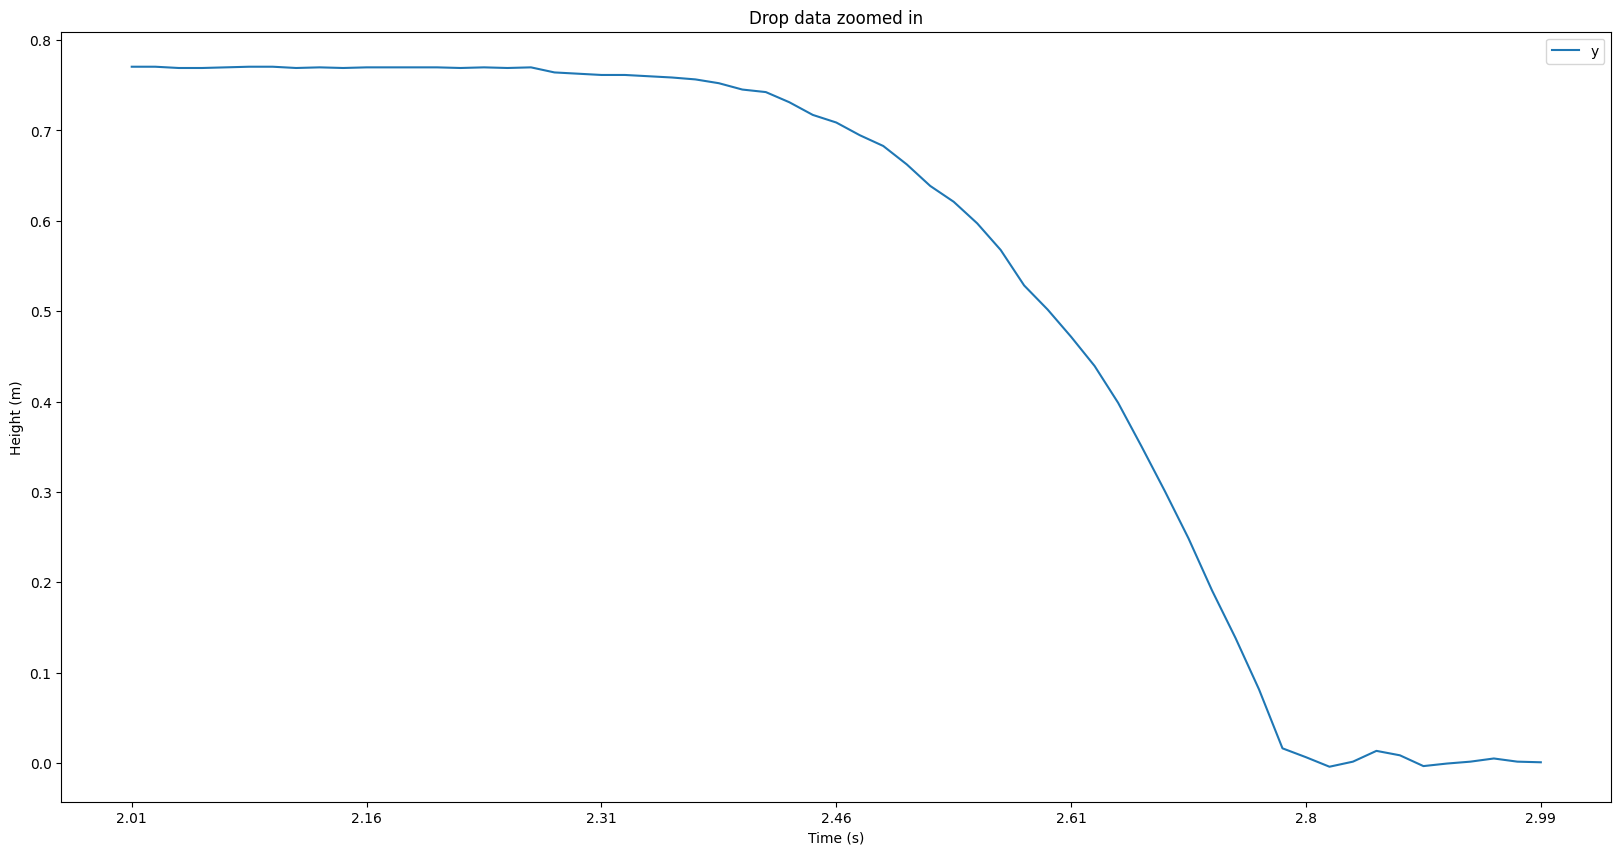

In [119]:
# Zoom in on the drop between 2000  and 3000 ms
start = 2
end = 3
indices = np.where((timestamps > start) & (timestamps < end))
plot_axis_data(distances[indices], timestamps[indices], 'Drop data zoomed in')

Herken je de curve? Volgens welk voorschrift zou de positie van het voorwerp veranderen?

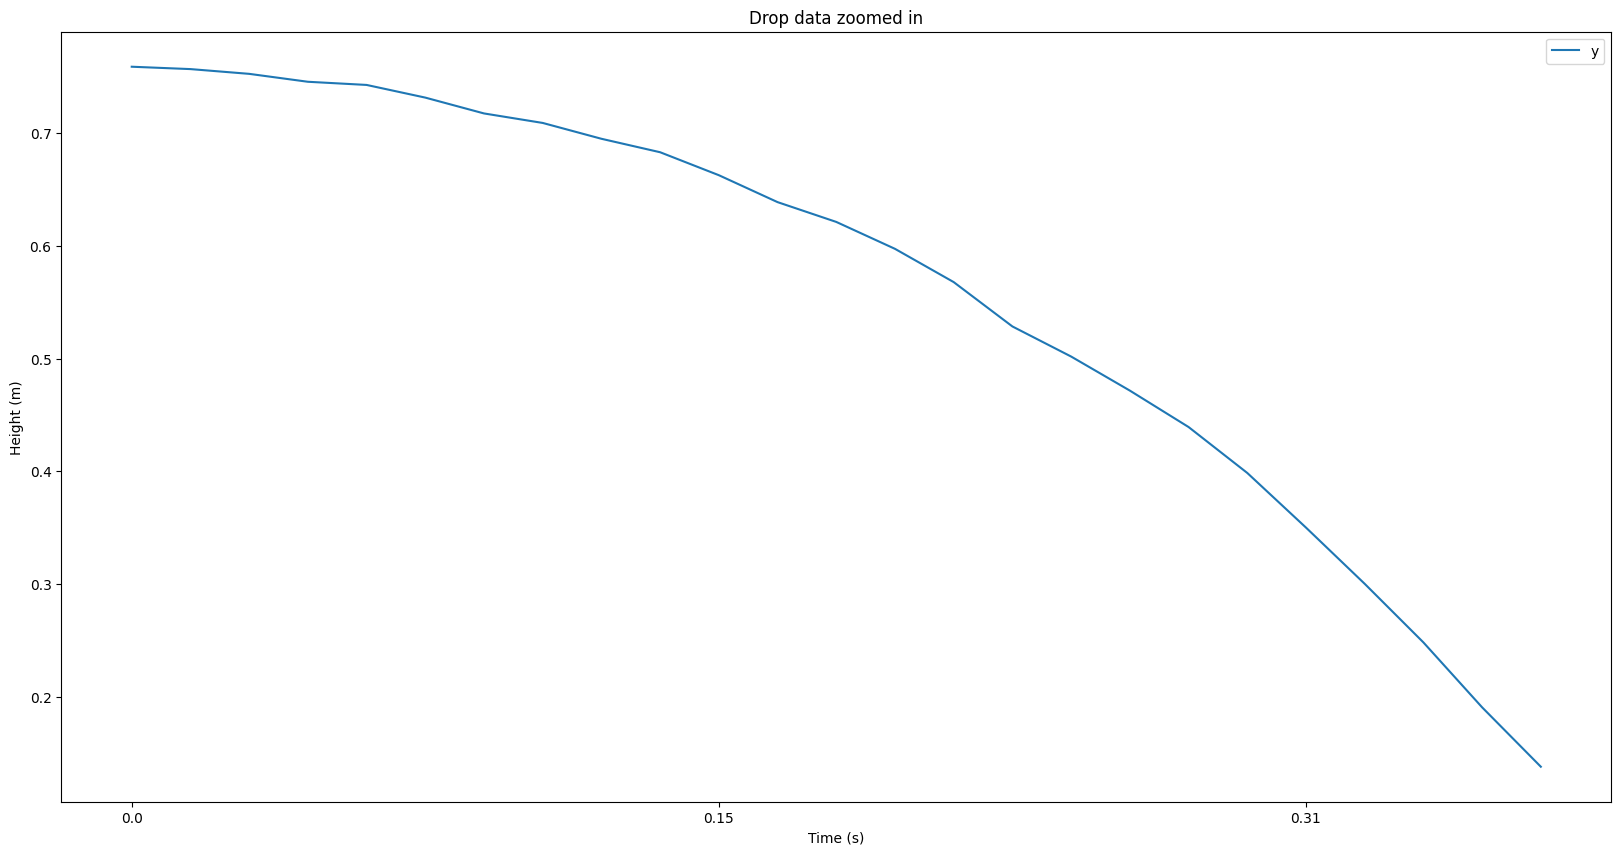

In [120]:
# We gaan ervan uit dat de curve loopt volgens het voorschrift van een parabool. (y = a*x^2 + b*x + c)

# We gaan nu op zoek naar de waarden voor a, b en c die het beste passen bij de data.

# We gaan dit doen door de methode van de kleinste kwadraten te gebruiken.


# Om zeker te zijn dat we enkel punten nemen van de beweging, zoomen we er nog wat meer op in.

# Zoom in on the drop between 2000  and 3000 ms
start = 2.350
end = 2.750
indices = np.where((timestamps > start) & (timestamps < end))
tijden = timestamps[indices]
afstanden = distances[indices]
tijden = tijden - tijden[0]
plot_axis_data(afstanden, tijden, 'Drop data zoomed in')

In [121]:
y = afstanden.T[0]
x = tijden

print(y)
print(x)


[0.75859649 0.75649123 0.7522807  0.74526316 0.74245614 0.73122807
 0.71719298 0.70877193 0.69473684 0.68280702 0.66245614 0.63859649
 0.62105263 0.59719298 0.5677193  0.52842105 0.50175439 0.47157895
 0.43929825 0.39859649 0.35017544 0.30035088 0.24842105 0.19087719
 0.13824561]
[0.    0.014 0.03  0.044 0.06  0.074 0.089 0.104 0.119 0.134 0.15  0.165
 0.181 0.197 0.213 0.23  0.246 0.262 0.28  0.296 0.313 0.332 0.349 0.368
 0.386]


In [122]:
X = np.vstack((x**2, x, np.ones_like(x))).T
print(X)

[[0.00000e+00 0.00000e+00 1.00000e+00]
 [1.96000e-04 1.40000e-02 1.00000e+00]
 [9.00000e-04 3.00000e-02 1.00000e+00]
 [1.93600e-03 4.40000e-02 1.00000e+00]
 [3.60000e-03 6.00000e-02 1.00000e+00]
 [5.47600e-03 7.40000e-02 1.00000e+00]
 [7.92100e-03 8.90000e-02 1.00000e+00]
 [1.08160e-02 1.04000e-01 1.00000e+00]
 [1.41610e-02 1.19000e-01 1.00000e+00]
 [1.79560e-02 1.34000e-01 1.00000e+00]
 [2.25000e-02 1.50000e-01 1.00000e+00]
 [2.72250e-02 1.65000e-01 1.00000e+00]
 [3.27610e-02 1.81000e-01 1.00000e+00]
 [3.88090e-02 1.97000e-01 1.00000e+00]
 [4.53690e-02 2.13000e-01 1.00000e+00]
 [5.29000e-02 2.30000e-01 1.00000e+00]
 [6.05160e-02 2.46000e-01 1.00000e+00]
 [6.86440e-02 2.62000e-01 1.00000e+00]
 [7.84000e-02 2.80000e-01 1.00000e+00]
 [8.76160e-02 2.96000e-01 1.00000e+00]
 [9.79690e-02 3.13000e-01 1.00000e+00]
 [1.10224e-01 3.32000e-01 1.00000e+00]
 [1.21801e-01 3.49000e-01 1.00000e+00]
 [1.35424e-01 3.68000e-01 1.00000e+00]
 [1.48996e-01 3.86000e-01 1.00000e+00]]


In [123]:
coef = np.linalg.inv(X.T @ X) @ X.T @ y
print(coef)

[-4.11429863 -0.0098256   0.75579337]


[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

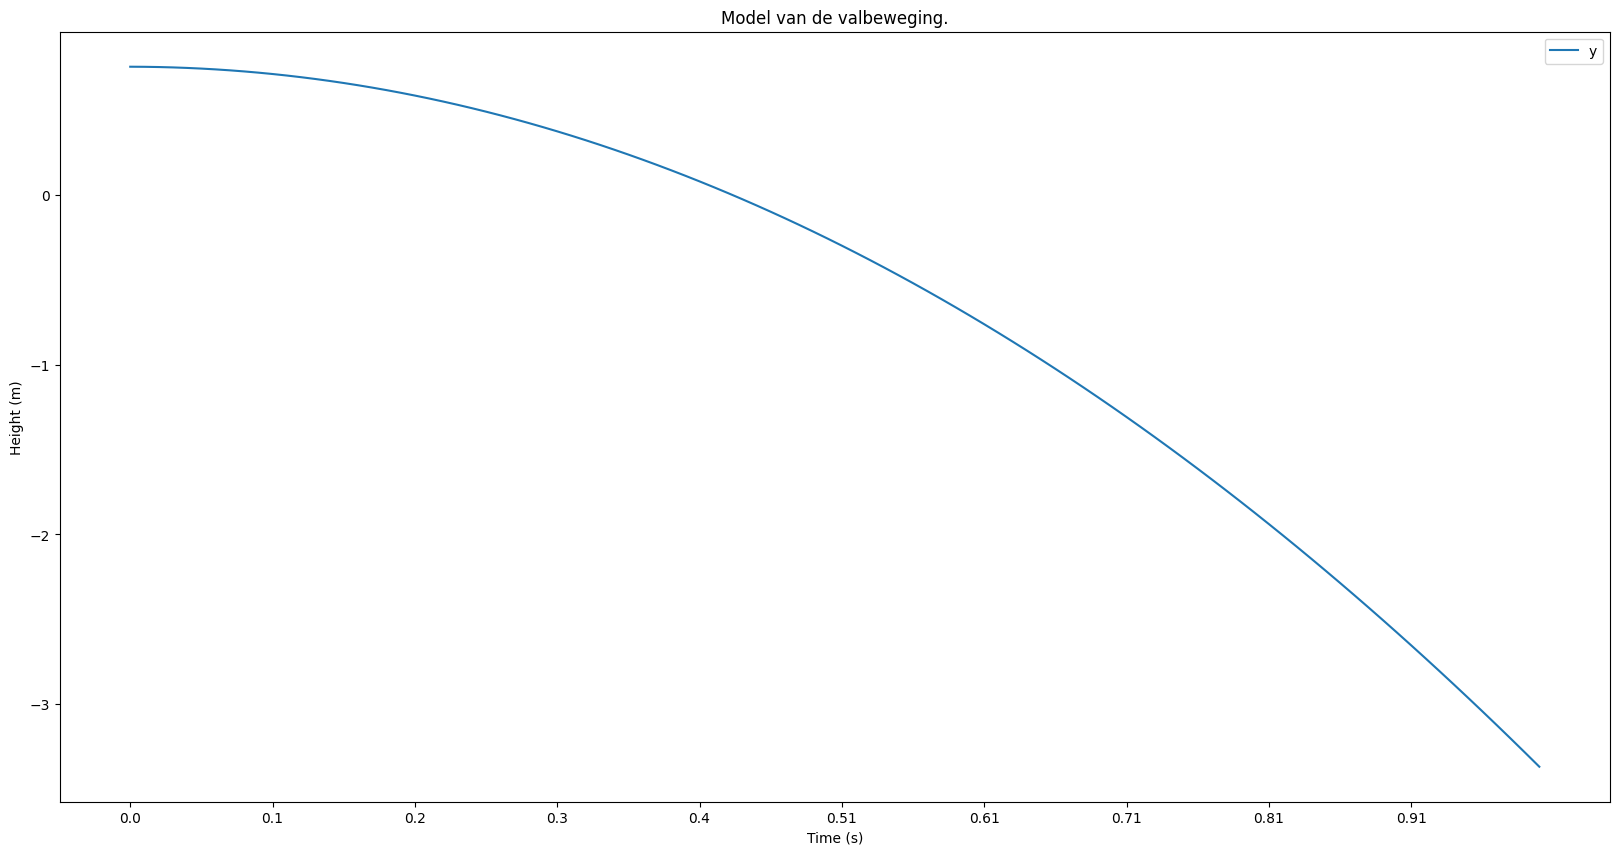

In [124]:
# Plot de vergelijking met de nieuwe coëfficiënten
x = np.linspace(0, 1, 100)
print(x)
y = coef[0] * x**2 + coef[1] * x + coef[2]

plot_axis_data(y.reshape(-1, 1), x, "Model van de valbeweging.")



In [125]:
# Beginhoogte volgens het wiskundig model
beginhoogte = coef[0] * 0**2 + coef[1] * 0 + coef[2]
print(f'Beginhoogte model: {beginhoogte} cm')
print(f'Beginhoogte data: {afstanden[0]} cm')

Beginhoogte model: 0.7557933654324637 cm
Beginhoogte data: [0.75859649] cm


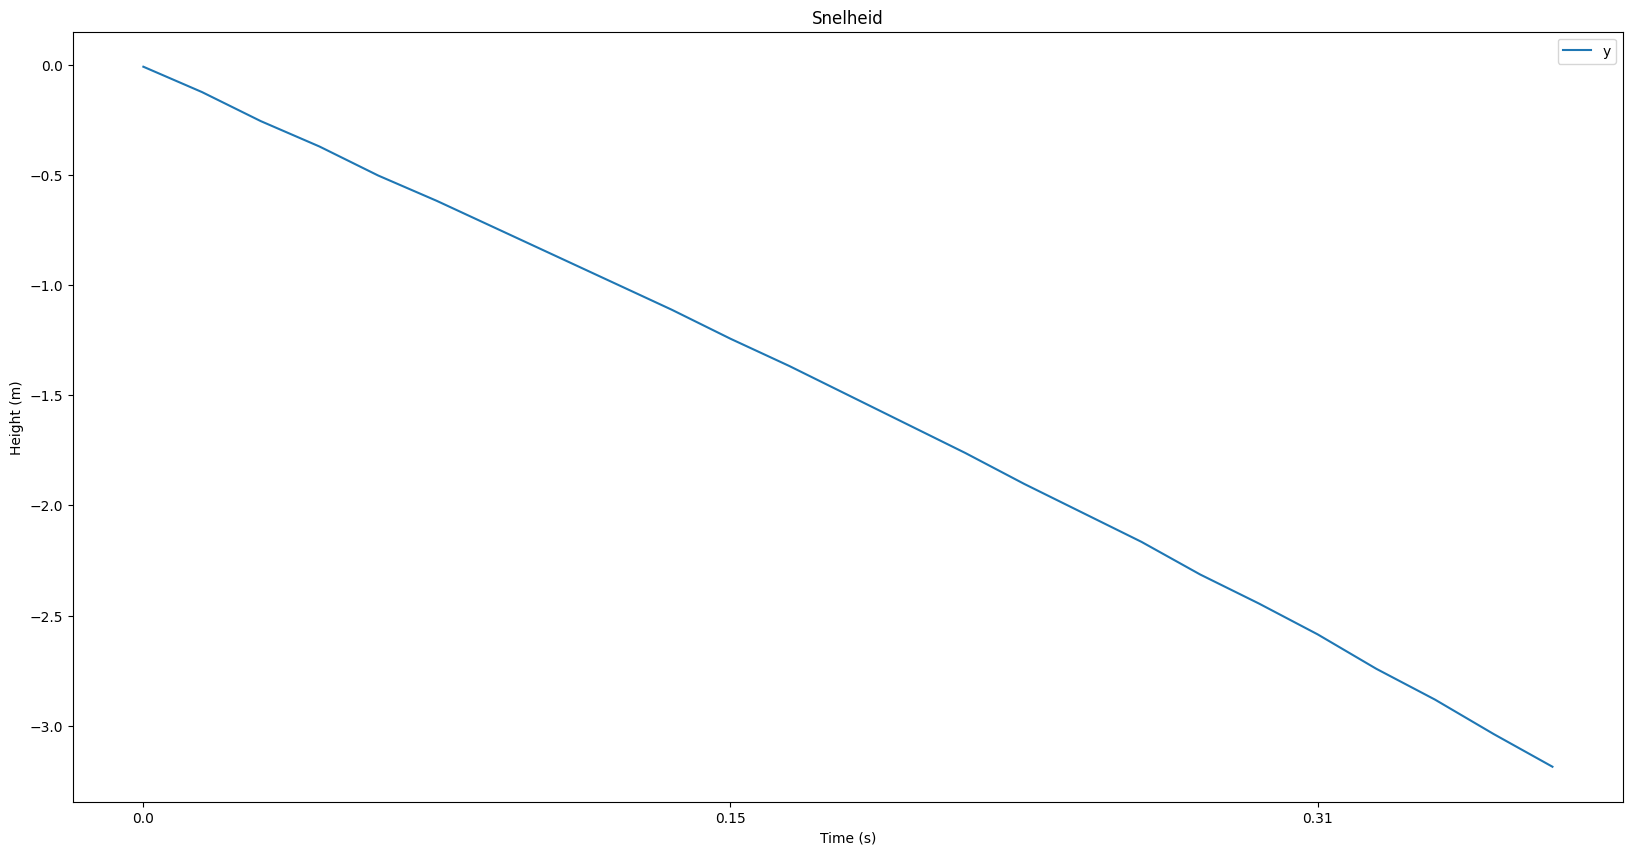

In [126]:
# Door de afgeleide van deze functie te bepalen, kunnen we het verloop van de snelheid van het object bekijken
# De afgeleide van de functie y = a*x^2 + b*x + c is y' = 2*a*x + b

snelheden = 2 * coef[0] * tijden + coef[1]
plot_axis_data(snelheden.reshape(-1, 1), tijden, 'Snelheid')

We merken dat de snelheid steeds negatiever wordt. Dit wil dus zeggen dat hoe langer het object valt, hoe sneller het zal gaan. Tot het de grond raakt natuurlijk.

[-8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727
 -8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727
 -8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727
 -8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727 -8.22859727
 -8.22859727]


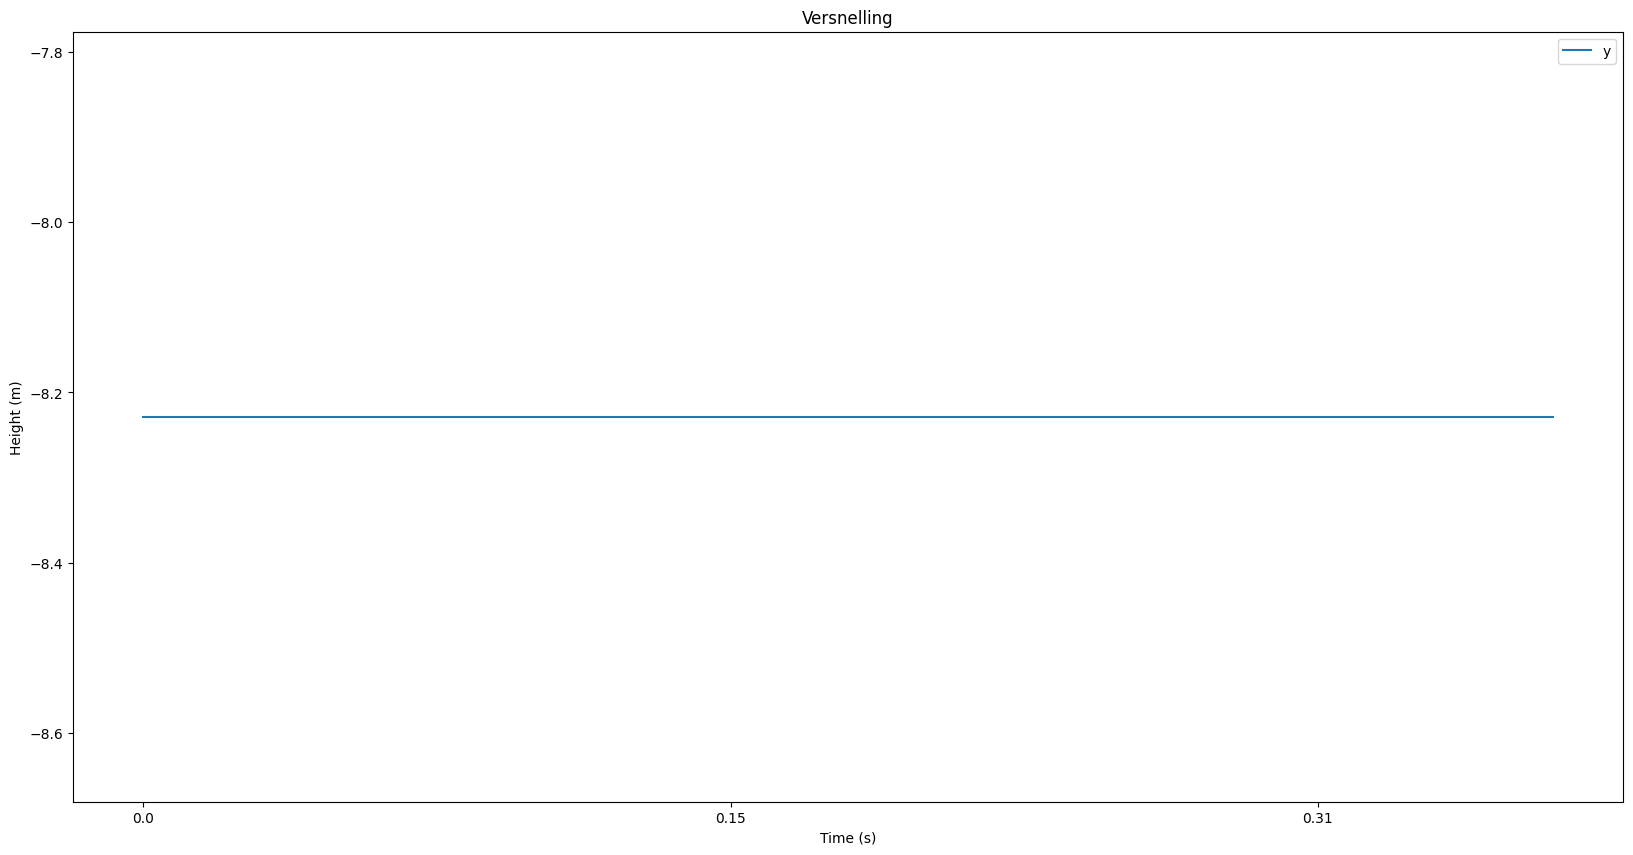

In [127]:
# De versnelling van het object kunnen we ook analyseren door de afgeleide van de snelheid te nemen
# De afgeleide van de snelheid is constant en gelijk aan 2*a
versnellingen = 2 * coef[0] * np.ones_like(tijden)	
print(versnellingen)

plot_axis_data(versnellingen.reshape(-1, 1), tijden, 'Versnelling')

We zien dat de versnelling van het object 8,22 m/s² is. Dat is niet exact de valversnelling die we in boeken kunnen lezen (9,81 m/s²) maar ligt er ook niet ver van. De versnelling is hier negatief omdat we in ons referentiekader ervoor gekozen hebben om de positieve z-as naar boven te doen wijzen.

# Opdracht

We hebben nu een wiskundig model van onze valbeweging. Dit model kunnen we nu gebruiken om voorspellingen te doen. 

Gebruik het wiskundig model om te voorspellen hoe lang het voorwerp zal vallen als we het vanop een hoogte van 2m laten vallen.